In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_validate, KFold
from sklearn.linear_model import LogisticRegression, LassoLarsIC, LinearRegression
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn import metrics
matplotlib.rcParams.update({'font.size': 20})
import matplotlib.patches as mpatches
import lightgbm as lgb
import re
from sklearn.model_selection import GridSearchCV


## Data Cleaning

In [3]:
GlobTerr = pd.read_excel("C:/Users/39393/Downloads/globalterrorismdb_0522dist.xlsx")

In [4]:
gtd = GlobTerr[["iyear", "imonth", "iday", "extended", "resolution", "summary", "crit1", "crit2", "crit3", "doubtterr", "alternative", "alternative_txt", "multiple", "related", "country", "country_txt", "region", "region_txt", "provstate", "vicinity", "location", "latitude", "longitude", "specificity", "attacktype1", "attacktype1_txt", "attacktype2", "attacktype2_txt", "attacktype3", "attacktype3_txt", "success", "suicide", "weaptype1", "weaptype1_txt", "weapsubtype1", "weapsubtype1_txt", "weapsubtype2", "weapsubtype2_txt", "weapsubtype3", "weapsubtype3_txt", "weapsubtype4", "weapsubtype4_txt", "weapdetail", "target1", "targtype1", "targtype1_txt", "targsubtype1", "targsubtype1_txt", "natlty1", "natlty1_txt", "target2", "targtype2", "targtype2_txt", "targsubtype2", "targsubtype2_txt", "corp2", "natlty2", "natlty2_txt", "target3", "targtype3", "targtype3_txt", "targsubtype3", "targsubtype3_txt", "corp3", "natlty3", "natlty3_txt", "gname", "guncertain1", "individual", "nperps", "claimed", "claimmode", "claimmode_txt", "compclaim", "claimmode2", "claim2", "claimmode3", "claim3", "nkill", "nkillus", "nkillter", "nwound", "nwoundus", "nwoundte", "property", "propextent", "propextent_txt", "ishostkid", "nhostkid", "nhostkidus", "nhours", "ndays", "divert", "ransom", "ransomamt", "ransomamtus", "ransompaid", "ransompaidus", "hostkidoutcome", "hostkidoutcome_txt", "nreleased", "INT_MISC"]]
gtd.info()

x = gtd.isna().sum().sort_values(ascending=False)
x = (x / len(gtd)) * 100
#miss.matrix(gb)

gb_new = gtd.loc[:, x < 30]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 102 entries, iyear to INT_MISC
dtypes: datetime64[ns](1), float64(47), int64(19), object(35)
memory usage: 163.2+ MB


In [6]:
gtd.info()

x = gtd.isna().sum().sort_values(ascending=False)
x = (x / len(gtd)) * 100
#miss.matrix(gb)

gtd_new = gtd.loc[:, x < 30]


#gb_new = gb_new.drop(columns = ["Unnamed: 0", "eventid"])
#gb_new

gtd_new.info()

#y = gb_new.head(30)

#gb_new.to_excel("gtd_compact.xlsx")

#gtd1 = pd.read_excel("C:/Users/39393/OneDrive/Desktop/Python_projects_VSC/Project ML/gtd_compact.xlsx")

gtd2 = gtd_new.rename(columns = {"crit1":"SocialGoals","crit2":"Intimidation","crit3":"OutInterLaw"})

gtd2 = gtd2.drop(["attacktype1","region","weaptype1","targtype1","natlty1","weapsubtype1","weapsubtype1_txt","targsubtype1","targsubtype1_txt","vicinity","latitude","longitude","specificity","imonth","iday","target1"], axis = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Columns: 102 entries, iyear to INT_MISC
dtypes: datetime64[ns](1), float64(47), int64(19), object(35)
memory usage: 163.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209706 entries, 0 to 209705
Data columns (total 41 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   iyear             209706 non-null  int64  
 1   imonth            209706 non-null  int64  
 2   iday              209706 non-null  int64  
 3   extended          209706 non-null  int64  
 4   crit1             209706 non-null  int64  
 5   crit2             209706 non-null  int64  
 6   crit3             209706 non-null  int64  
 7   doubtterr         209706 non-null  int64  
 8   multiple          209705 non-null  float64
 9   country           209706 non-null  int64  
 10  country_txt       209706 non-null  object 
 11  region            209706 non-null  int64  
 12  region_t

In [9]:
tmp = pd.Categorical(gtd2.gname)
tmp = tmp.codes
gtd2["gnumber"] = tmp

gtd1x = gtd2[gtd2.gname != "Unknown"]
gtd1x = gtd1x[gtd1x.weaptype1_txt != "Unknown"]
gtd1x = gtd1x[gtd1x.weaptype1_txt != "Other"]
gtd1x = gtd1x[gtd1x.attacktype1_txt != "Unknown"]
gtd1x = gtd1x[gtd1x.targtype1_txt != "Unknown"]
gtd1x = gtd1x[gtd1x.targtype1_txt != "Other"]
gtd1x = gtd1x[gtd1x.provstate != "Unknown"]
gtd1x = gtd1x[gtd1x.natlty1_txt != "Unknown"]

groups = gtd1x.gname
c = groups.value_counts()
gtd2 = pd.DataFrame(gtd1x)
len(gtd1x)
gtd2

,iyear,extended,SocialGoals,Intimidation,OutInterLaw,doubtterr,multiple,country,country_txt,region_txt,...,natlty1_txt,gname,guncertain1,individual,nkill,nwound,property,ishostkid,INT_MISC,gnumber
5,1970,0,1,1,1,0,0.0,217,United States,North America,...,United States,Black Nationalists,0.0,0,0.0,0.0,1,0.0,0,716
6,1970,0,1,1,1,0,0.0,218,Uruguay,South America,...,Uruguay,Tupamaros (Uruguay),0.0,0,0.0,0.0,0,0.0,0,3456
8,1970,0,1,1,1,0,0.0,217,United States,North America,...,United States,New Year's Gang,0.0,0,0.0,0.0,1,0.0,0,2384
9,1970,0,1,1,1,0,0.0,217,United States,North America,...,United States,New Year's Gang,0.0,0,0.0,0.0,1,0.0,0,2384
10,1970,0,1,1,0,1,0.0,217,United States,North America,...,United States,"Weather Underground, Weathermen",0.0,0,0.0,0.0,0,0.0,0,3626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209695,2020,0,1,1,1,0,0.0,229,Democratic Republic of the Congo,Sub-Saharan Africa,...,Democratic Republic of the Congo,Patriotic Resistance Front in Ituri (FRPI),0.0,0,0.0,0.0,1,1.0,0,2540
209698,2020,1,1,1,1,0,0.0,229,Democratic Republic of the Congo,Sub-Saharan Africa,...,Democratic Republic of the Congo,Allied Democratic Forces (ADF),0.0,0,25.0,NaN,0,1.0,0,236
209701,2020,0,1,1,1,0,0.0,228,Yemen,Middle East & North Africa,...,Yemen,Houthi extremists (Ansar Allah),0.0,0,NaN,NaN,1,0.0,0,1461
209702,2020,0,1,1,1,0,0.0,228,Yemen,Middle East & North Africa,...,Yemen,Houthi extremists (Ansar Allah),0.0,0,NaN,NaN,0,0.0,0,1461


In [20]:
c = pd.DataFrame(c)
c

,gname
Taliban,7984
Islamic State of Iraq and the Levant (ISIL),5441
Shining Path (SL),4041
Al-Shabaab,3616
Farabundo Marti National Liberation Front (FMLN),2990
...,...
Death to Drug Traffickers,1
Jerusalem Groups Hebrew (Qvutzot Yerushalayim),1
Mormon Extremist,1
Anti-Kim Jong-il extremists,1


In [21]:
print(c.sum())print(c.sum())

gname    97166
dtype: int64


In [23]:
print(c[:10].sum()/c.sum())

gname    0.375481
dtype: float64


In [26]:
print(c.describe())

             gname
count  3338.000000
mean     29.109047
std     240.237766
min       1.000000
25%       1.000000
50%       2.000000
75%       5.000000
max    7984.000000


In [ ]:
groups = gtd1x.iyear
c = groups.value_counts().sort_index()
type(c)
pct_change = c.pct_change()
print(pct_change.mean())

0.0890251445154502


<AxesSubplot:xlabel='iyear'>

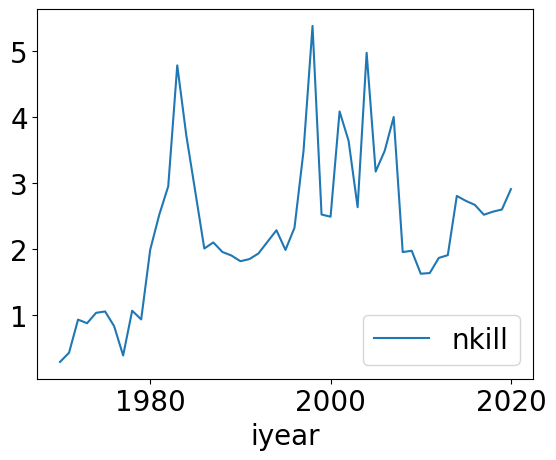

In [42]:
gtd1.groupby("iyear")["nkill"].mean().plot(legend=True)

In [13]:
groups = gtd1x.nkill
c = groups.value_counts()
c

0.0       37545
1.0       16877
2.0        6896
3.0        4279
4.0        2951
          ...  
670.0         1
1700.0        1
310.0         1
298.0         1
179.0         1
Name: nkill, Length: 188, dtype: int64

In [14]:
groups = gtd1x.gname
c = groups.value_counts()
c= pd.Series(c[:5])
c

Taliban                                             7984
Islamic State of Iraq and the Levant (ISIL)         5441
Shining Path (SL)                                   4041
Al-Shabaab                                          3616
Farabundo Marti National Liberation Front (FMLN)    2990
Name: gname, dtype: int64

In [30]:

#groups = pd.DataFrame(np.sort(groups))
#groupsn = gtd_cleaned.gnumber.unique()
#groups["gnumber"] = np.sort(groupsn)

"del tmp,gtd_list, groups, groupsn"
# Replacing NAs

gtd_cleaned = gtd2.dropna()

r = gtd2.groupby("gname")
r = r.count()
r.rename(columns = {"Unnamed: 0":"Frequency"},inplace=True)
r.reset_index(inplace=True)

# Re encoding
# drop the groups that, after the cleaning, have carried out less than 10 attacks
r = r[r.Frequency > 9]
r = r.gname.tolist()
gtd2 = gtd2[pd.DataFrame(gtd2.gname.tolist()).isin(r).any(1).values]
#del r

gtd2.reset_index(inplace = True)

for col in gtd_cleaned.columns:
    if gtd_cleaned[col].dtype == "object":
        encode = LabelEncoder()
        gtd_cleaned[col] = encode.fit_transform(gtd_cleaned[col])


"del gtd_cleaned, weapons, attack_type, province, countries, targtype, nationality, regions"
tmp = pd.Categorical(gtd_cleaned.gname)
tmp = tmp.codes
gtd_cleaned["gnumber"] = tmp

groups = gtd_cleaned.gname.unique()
#
"del tmp,gtd_list, groups, groupsn"
# Replacing NAs

x = gtd_cleaned.isna().sum().sort_values(ascending=False)
#del gtd_cleaned, x

C:\Users\39393\AppData\Local\Temp\ipykernel_4488\42479739.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_cleaned[col] = encode.fit_transform(gtd_cleaned[col])
C:\Users\39393\AppData\Local\Temp\ipykernel_4488\42479739.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gtd_cleaned["gnumber"] = tmp


## Exploratory Data Analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [54]:
gtd1["gname"]

4          56
5         307
7         320
8         166
10        166
         ... 
197674    233
197677     20
197680    117
197681    117
197682    168
Name: gname, Length: 87115, dtype: int32

In [67]:
# create dummy variables for the categorical columns
data = pd.get_dummies(gtd_cleaned, columns=['extended', 'SocialGoals', 'Intimidation',"OutInterLaw","doubtterr","multiple","country","success","suicide","individual","property","ishostkid","INT_MISC"])

# Compute and visualize the correlations between the dummy variables
corr = data.corr()

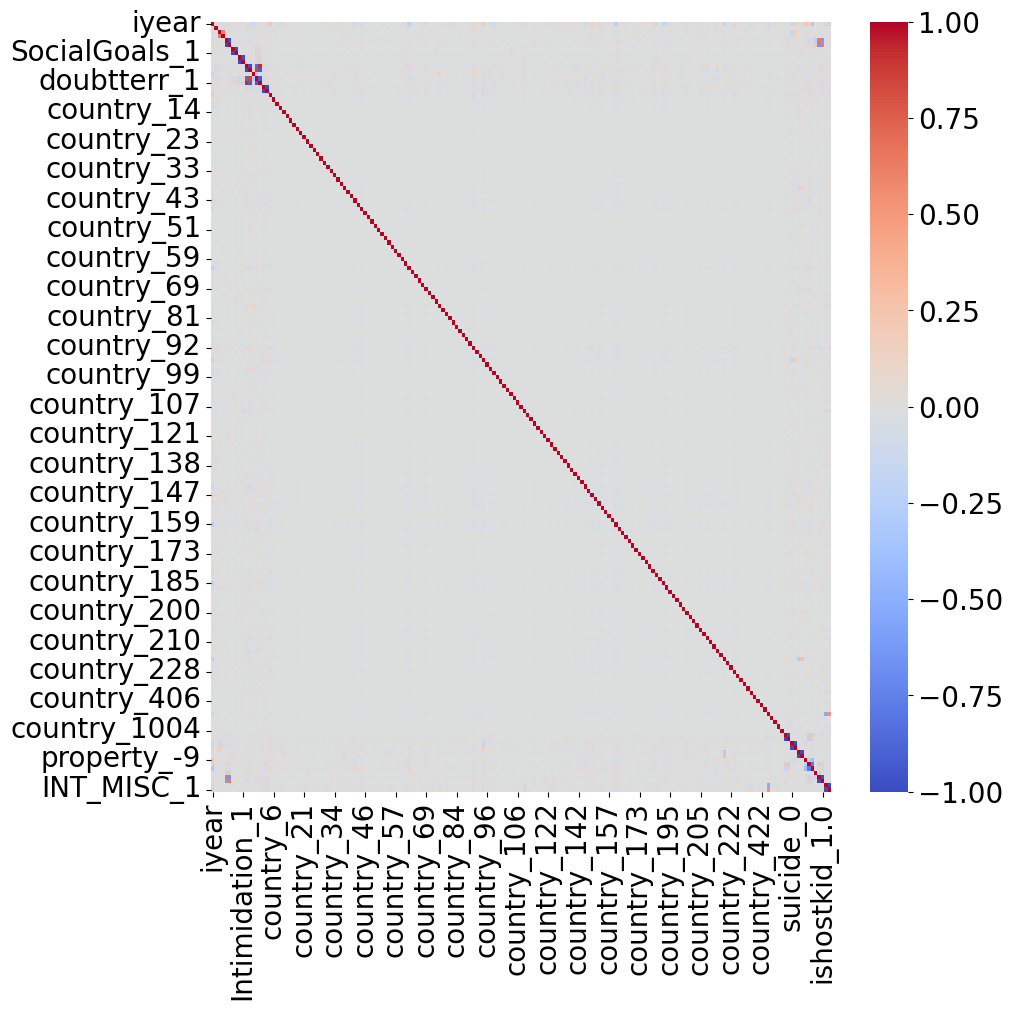

In [55]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

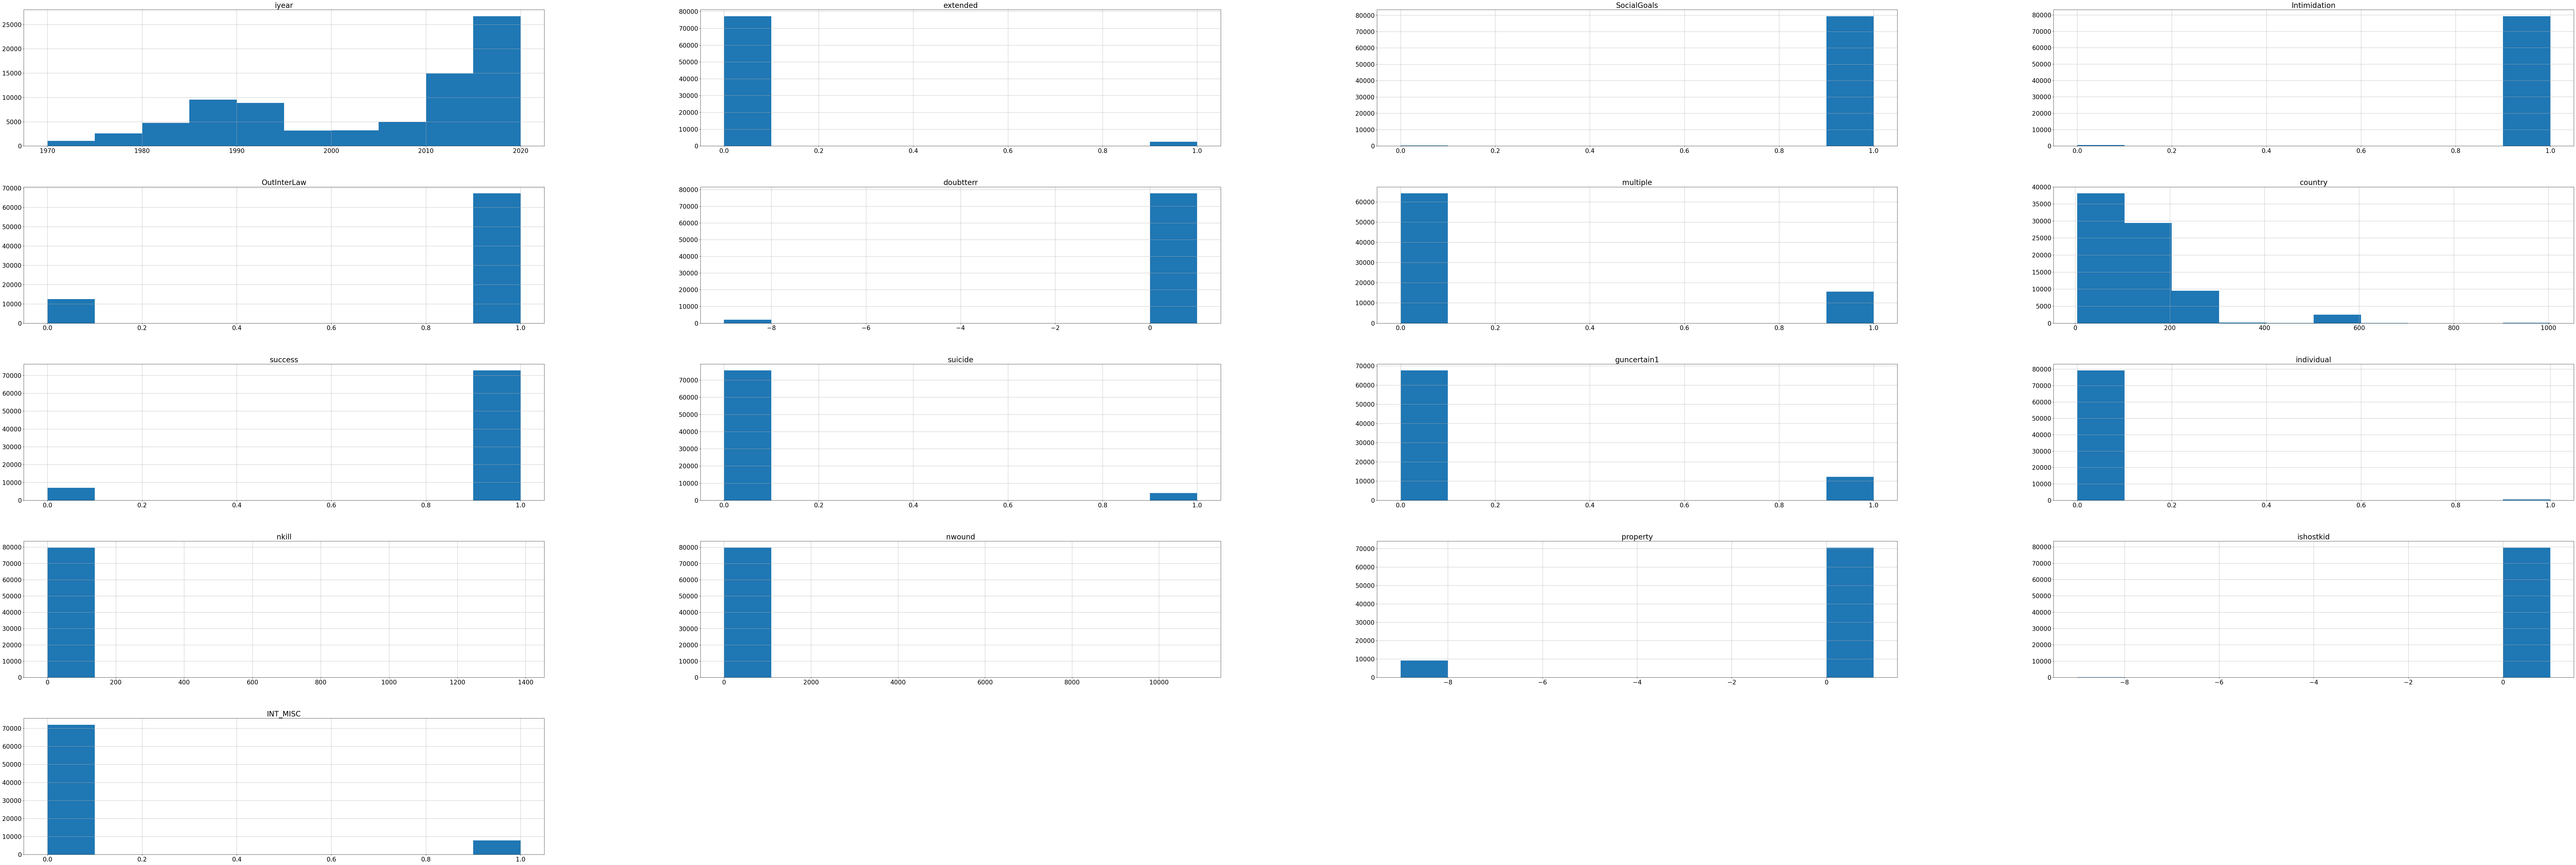

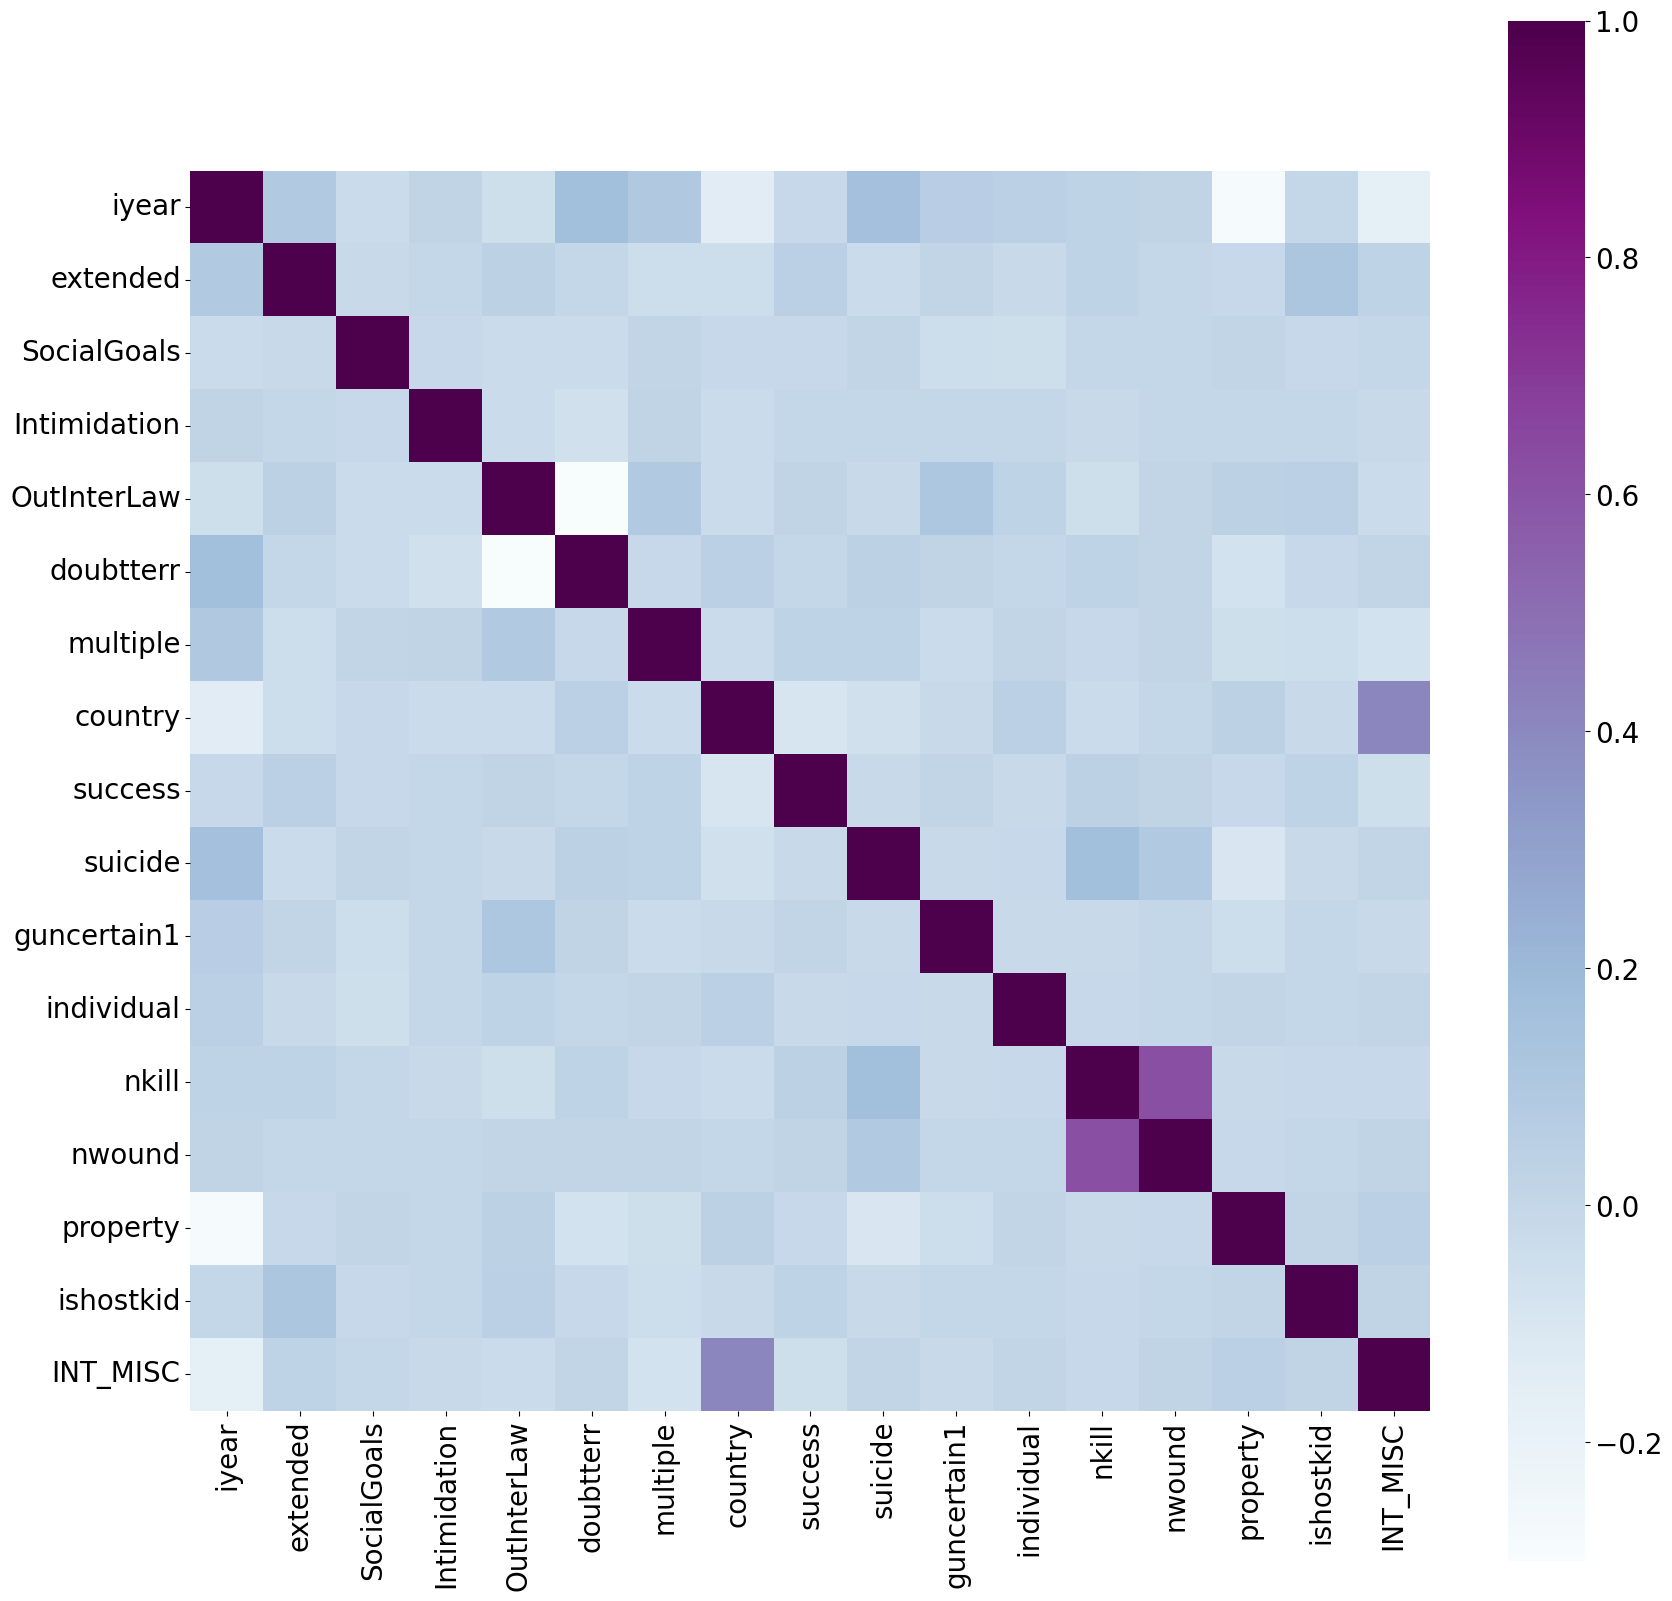

In [50]:
gtd_cleaned.describe()

# histogram for data distribution
gtd_cleaned.hist(figsize = (150,50))

# Correlation
corrmat = np.round(gtd_cleaned.corr(),2)
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=1, square=True, cmap="BuPu");
plt.show()

The only relatively high correaltion we observe is between nwound and nkill, as expected. By the way, we have decided to keep them in our dataset in order to not discard importnat information. 

In [73]:
x = gtd_cleaned.gname
x

4          56
5         307
7         320
8         166
10        166
         ... 
197667    200
197669    292
197670    292
197674    233
197682    168
Name: gname, Length: 76242, dtype: int32

Text(0.5, 0, 'Year')

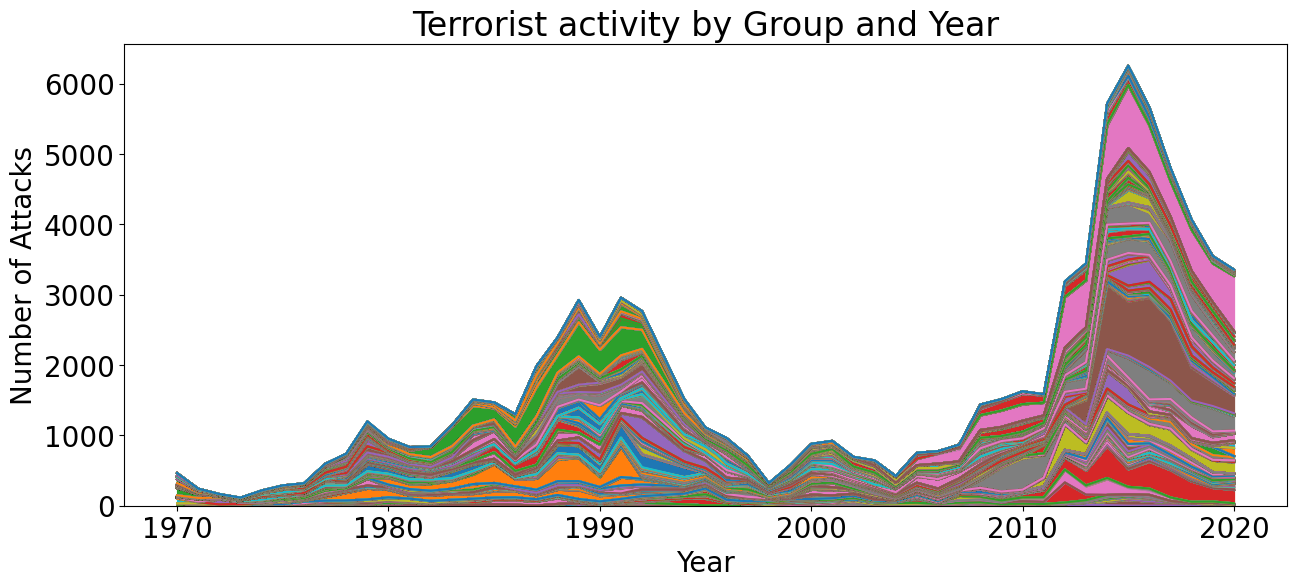

In [33]:
x = pd.crosstab(gtd_cleaned.iyear, gtd_cleaned.gname)

# create a plot of the crosstab, using the legend
x.plot(kind = "area", figsize = (15,6), legend = None)

# set the title and labels of the plot
plt.title("Terrorist activity by Group and Year")
plt.ylabel("Number of Attacks")
plt.xlabel("Year")

<AxesSubplot:>

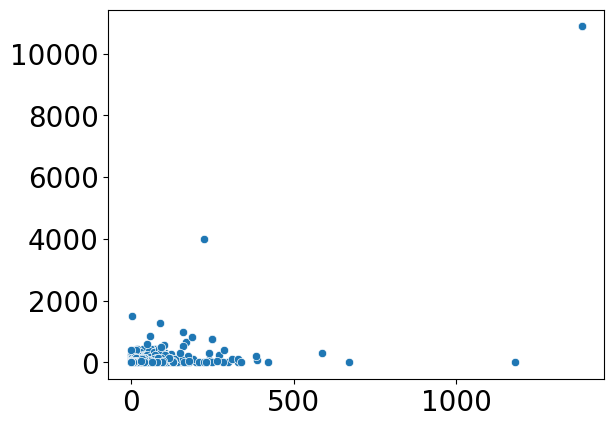

In [21]:
x = np.array(gtd_cleaned.nkill)
y = np.array(gtd_cleaned.nwound)
sns.scatterplot(x = x, y = y)

### Investigating "ishostkid" and "extended"

<AxesSubplot:>

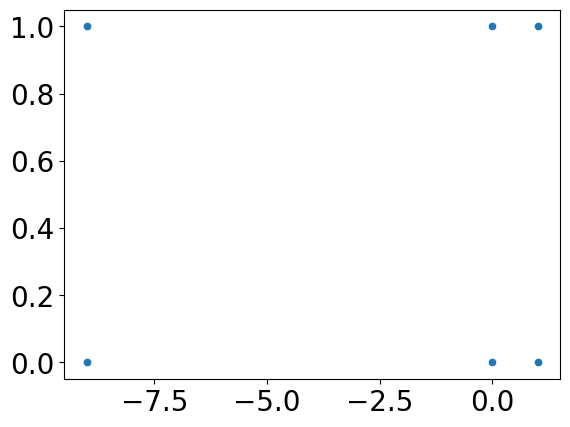

In [22]:
x = np.array(gtd_cleaned.ishostkid)
y = np.array(gtd_cleaned.extended)
sns.scatterplot(x = x, y = y)

## Investigating "weaptype" and "attacktype"

<AxesSubplot:>

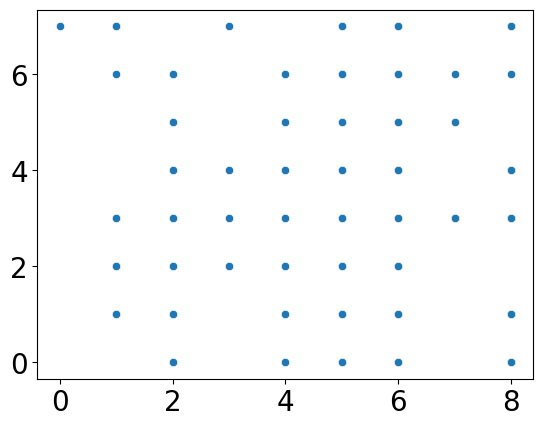

In [23]:
x = np.array(gtd_cleaned.weaptype1_txt)
y = np.array(gtd_cleaned.attacktype1_txt)
sns.scatterplot(x = x, y = y)

## Random Forest

In [6]:
gtd_cleaned = gtd_cleaned.rename(columns=lambda x: re.sub('[^A-Za-z0-9_]+', '', x))

gtd_target = gtd_cleaned.gnumber
gtd_features = gtd_cleaned.drop(["gnumber","gname"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(gtd_features, gtd_target, test_size=0.2)


In [95]:
dclassifier = RandomForestClassifier(n_estimators = 100, max_depth = 26, random_state = 0)
X, y = make_classification()
dclassifier.fit(X_train, y_train)
dclassifier_pred = dclassifier.predict(X_test)
print(accuracy_score(y_test,  dclassifier_pred))
print(classification_report(y_test,dclassifier_pred))

cm = confusion_matrix(y_test, dclassifier_pred)

0.8133191195836208
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.50      1.00      0.67         1
           3       0.00      0.00      0.00         1
           4       1.00      1.00      1.00         1
           5       1.00      0.67      0.80         6
           6       1.00      0.29      0.44         7
           7       1.00      0.18      0.31        11
           8       0.91      0.79      0.84       103
           9       1.00      1.00      1.00         1
          10       0.62      0.50      0.56        10
          11       0.80      0.29      0.42        14
          12       0.94      0.94      0.94        87
          13       0.00      0.00      0.00         3
          14       0.67      0.75      0.71         8
          15       0.00      0.00      0.00         5
          16       0.39      0.46      0.43        28
          17       1.00      0.33      0.50         3
        

c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

## 10-fold cross validation

In [98]:
from sklearn.model_selection import KFold, cross_val_score
kf = KFold(n_splits=10)
kf

def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)


In [103]:
X = gtd_cleaned.to_numpy() #Convert dataframe to NumPy array
y = gtd_target.to_numpy() #Convert dataframe to NumPy array
kf = StratifiedKFold(n_splits=10) #Split into 10 folds 

for train_index, test_index in kf.split(X):
 #print(train_index,test_index)
 X_train, X_test = X[train_index], X[test_index]
 y_train, y_test = y[train_index], y[test_index]

dclassifier.fit(X_train, y_train)
dclassifier_pred = dclassifier.predict(X_test)
print(accuracy_score(y_test,  dclassifier_pred)) 

TypeError: split() missing 1 required positional argument: 'y'

In [105]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(dclassifier, X, y, cv=cv)

array([0.98607918, 0.98666444, 0.98699887, 0.98708248, 0.98754233])

In [108]:
skf = StratifiedKFold(n_splits=2)
skf.get_n_splits(X, y)

print(skf)
cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
cross_val_score(dclassifier, X, y, cv=cv)

StratifiedKFold(n_splits=2, random_state=None, shuffle=False)


c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


array([0.94851696, 0.98802283, 0.98808553, 0.99002947, 0.96093309])

## Random Forest - Parameter tuning

In [ ]:
# create random forest classifier with default settings
clf = RandomForestClassifier()

# define range of values for n_estimators and max_depth
param_grid = {
    'n_estimators': range(10, 100, 10),
    'max_depth': range(2, 10),
}

# use GridSearchCV to tune n_estimators and max_depth using 5-fold cross validation
grid = GridSearchCV(clf, param_grid, cv=5, n_jobs = 4)
grid.fit(X_train, y_train)

# print best values for n_estimators and max_depth
print('Best n_estimators:', grid.best_params_["n_estimators","max_depth"])

In [ ]:
get_score(RandomForestClassifier(n_estimators = 200,max_depth=45), X_train, X_test, y_train, y_test)

In [ ]:
x = gtd_target.unique()
len(x)

321

## Logistic Regression

In [ ]:
logreg = LogisticRegression(n_jobs=4, max_iter=1000, multi_class = "multinomial")
   
model_fit = logreg.fit(X_train, y_train)

In [ ]:
logreg_pred = model_fit.predict(X_test)
print(classification_report(y_test, logreg_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00         7
           2       0.00      0.00      0.00       104
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        13
           5       0.00      0.00      0.00        97
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00        28
           8       0.00      0.00      0.00         8
           9       0.00      0.00      0.00        48
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00        31
          13       0.00      0.00      0.00        14
          14       0.00      0.00      0.00       108
          15       0.00      0.00      0.00       162
          16       0.00      0.00      0.00        56
          17       0.00    

c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Ridge

In [ ]:
ridge = LogisticRegression(n_jobs=4, max_iter=1000, multi_class = "multinomial", penalty = "l2")
   
ridge_fit = ridge.fit(X_train, y_train)

In [ ]:
ridge_pred = ridge_fit.predict(X_test)
print(classification_report(y_test, ridge_pred))

## Lasso

In [ ]:
lasso = LogisticRegression(n_jobs=4, max_iter=1000, multi_class = "multinomial", penalty = "l1")
   
lasso_fit = lasso.fit(X_train, y_train)

In [ ]:
lasso_pred = lasso_fit.predict(X_test)
print(classification_report(y_test, lasso_pred))

## Bagging

In [18]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier()

# define range of values for n_estimators and max_depth
param_grid = {
    'n_estimators': range(50, 71,10),
}

# use GridSearchCV to tune n_estimators and max_depth using 5-fold cross validation
grid = GridSearchCV(bagging, param_grid, cv=5,scoring='f1_macro',n_jobs = -1)

In [ ]:
grid.fit(X_train, y_train)

In [17]:
# print best values for n_estimators and max_depth
print('Best n_estimators:', grid.best_params_)

Best n_estimators: {'n_estimators': 50}


In [13]:
print(accuracy_score(y_test,  bag_pred))
print(classification_report(y_test,bag_pred))

cm = confusion_matrix(y_test, bag_pred)

0.7632660248884715
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           5       0.78      1.00      0.88         7
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          11       0.60      1.00      0.75         3
          16       0.00      0.00      0.00         2
          17       0.75      1.00      0.86         3
          18       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         1
          21       0.50      0.25      0.33         4
          22       0.00      0.00      0.00         0
          24       0.00      0.00      0.00         2
        

c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

## Confusion matrix

In [ ]:
cm = confusion_matrix(y_test, dclassifier_pred)
print(cm)

# compute and print overall accuracy
accuracy = (cm[0,0] + cm[1,1]) / cm.sum()
print('Accuracy:', accuracy)

# compute and print precision and recall
precision = cm[1,1] / (cm[1,1] + cm[0,1])
recall = cm[1,1] / (cm[1,1] + cm[1,0])
print('Precision:', precision)
print('Recall:', recall)

[[ 3  0  0 ...  0  0  0]
 [ 0  3  0 ...  0  0  0]
 [ 0  0 81 ...  0  0  0]
 ...
 [ 0  0  0 ...  3  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0 17]]
Accuracy: 0.0003934684241589612
Precision: 1.0
Recall: 1.0


## Light Gradient Boosting Machine (LGBM)

In [24]:

classnumb = gtd_target.nunique() +1
# defining parameters
params = {'n_jobs': 4, 'min_data_in_leaf': 10, 'boosting': 'gbdt', 'objective': 'multiclass', 'num_leaves': 131072,
          'num_class': classnumb, 'max_depth': 35}

"""params = {'n_jobs': 4, 'min_data_in_leaf': 10, 'boosting': 'gbdt', 'objective': 'multiclass',
          'num_class': classnumb, 'max_depth': 35}"""

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# fitting the model
model = lgb.train(params,
                  train_set=lgb_train,
                  valid_sets=lgb_eval,
                  early_stopping_rounds=30)

# prediction
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cr)
print(cm)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: country_txt, region_txt, provstate, attacktype1_txt, weaptype1_txt, targtype1_txt, natlty1_txt

In [ ]:
# prediction
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(cr)
print(cm)

In [20]:
print(cr)

NameError: name 'cr' is not defined

## LGBM - Parameter tuning

In [21]:
# create LightGBM classifier with default settings
clf = LGBMClassifier()

# define range of values for num_leaves
param_grid = {'num_leaves': range(10, 200, 10), "n_jobs" : 4}

# use GridSearchCV to tune num_leaves using 5-fold cross validation
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

NameError: name 'LGBMClassifier' is not defined

In [22]:
# print best value for num_leaves
print('Best num_leaves:', grid.best_params_['num_leaves'])

NameError: name 'grid' is not defined

# Something

In [34]:
###########################
# create random forest classifier with default settings
clf = RandomForestClassifier()

# define range of values for n_estimators and max_depth
param_grid = {
    'n_estimators': range(100, 201, 50),
    'max_depth': range(26, 47, 5),
}

# use GridSearchCV to tune n_estimators and max_depth using 5-fold cross validation
grid = GridSearchCV(clf, param_grid, cv=5, n_jobs= -1)
grid.fit(X_train, y_train)

# print best values for n_estimators and max_depth


c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
6 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\39393\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\39393\AppData\

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(26, 32, 2),
                         'n_estimators': range(100, 200, 50)})

In [35]:
print('Best n_estimators:', grid.best_params_["n_estimators"])

Best n_estimators: 100


In [36]:
print('Best max_depth:', grid.best_params_["max_depth"])

Best max_depth: 26
